# Introduction
### **Context**
It is the dataset of a U.S. bank customer for getting the information that , this particular customer will leave bank or not.

### **Content**
Various Bank detail is given like CustomerID , surname, Credit score and many more.

### **Acknowledgements**
This dataset is originated from a U.S. bank.



# Necessary Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize']= [10,5]

# Loading Dataset

In [2]:
df = pd.read_csv('/content/Churn_Modelling.csv')

# Data Preprocessing

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [5]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [6]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
df.count()

RowNumber          10000
CustomerId         10000
Surname            10000
CreditScore        10000
Geography          10000
Gender             10000
Age                10000
Tenure             10000
Balance            10000
NumOfProducts      10000
HasCrCard          10000
IsActiveMember     10000
EstimatedSalary    10000
Exited             10000
dtype: int64

In [8]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
duplicate =df.duplicated().sum()
duplicate

0

In [10]:
df.shape

(10000, 14)

In [11]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [12]:
# removing unnecessary columns

columns= ['RowNumber','CustomerId','Surname']

df.drop(columns, axis=1, inplace= True)

In [13]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [14]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [15]:
df['Geography'].unique()
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [16]:
df.Gender=pd.Categorical(df.Gender).codes
df.Geography=pd.Categorical(df.Geography).codes

In [17]:
df.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
5,645,2,1,44,8,113755.78,2,1,0,149756.71,1
6,822,0,1,50,7,0.00,2,1,1,10062.80,0
7,376,1,0,29,4,115046.74,4,1,0,119346.88,1
8,501,0,1,44,4,142051.07,2,0,1,74940.50,0
9,684,0,1,27,2,134603.88,1,1,1,71725.73,0


# Visualization


<Axes: >

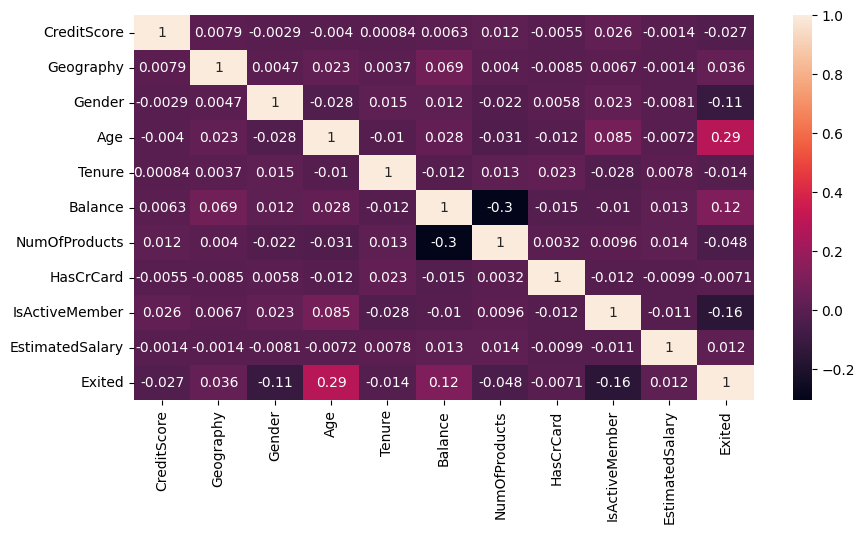

In [18]:
# Correlation between numerical features

sns.heatmap(data=df.corr(), annot= True)

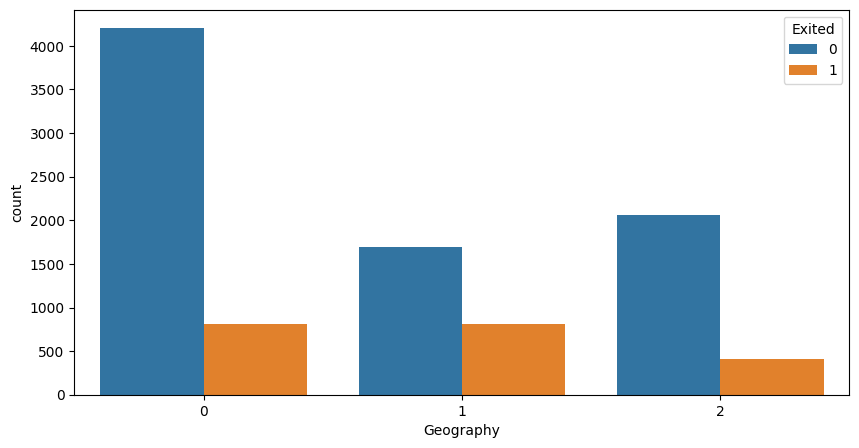

In [19]:
sns.countplot(x='Geography',hue='Exited',data=df)
plt.show()

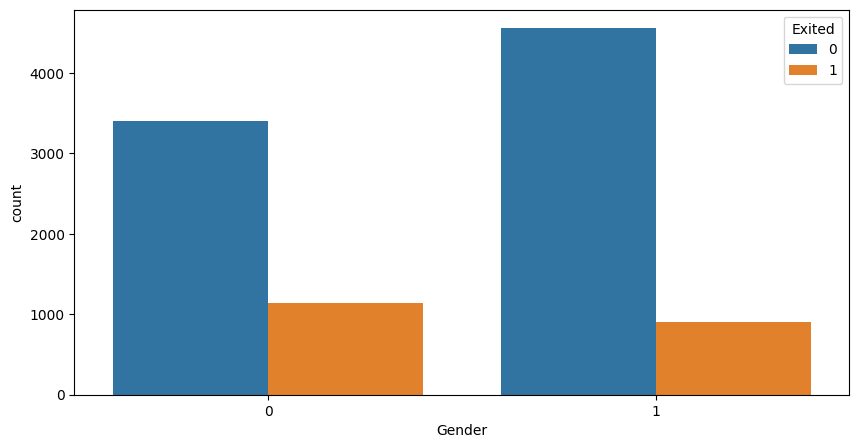

In [20]:
sns.countplot(x='Gender',hue='Exited',data=df)
plt.show()

In [21]:
x= df.drop(['Exited'], axis=1)

y= df['Exited']

# Train Test Split

In [22]:
x_train,x_test, y_train,y_test= train_test_split(x,y, random_state= 101, test_size=0.25)

In [23]:
x_train.shape


(7500, 10)

In [24]:
x_test.shape

(2500, 10)

# Logistic Regression

In [25]:
lr= LogisticRegression()

## Standard Scaling

In [26]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [27]:
lr.fit(x_train,y_train)

LogisticRegression()

In [28]:
y_pred= lr.predict(x_test)

In [29]:
accuracy= round(accuracy_score(y_test,y_pred)*100,2)
print('Accuracy of the model Is:',accuracy)

Accuracy of the model Is: 80.68


# Random Forest Classifier


In [30]:
rfc= RandomForestClassifier()

In [31]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [32]:
y_pred= rfc.predict(x_test)

Accuracy= round(accuracy_score(y_test,y_pred)*100,2)

In [33]:
print("Accuracy of the Random Forest Classifier is: ", Accuracy)

Accuracy of the Random Forest Classifier is:  86.72


# Gradient Boosting

In [34]:
grb = GradientBoostingClassifier()

In [35]:
grb.fit(x_train,y_train)

GradientBoostingClassifier()

In [36]:
y_pred= grb.predict(x_test)

In [37]:
accuracy = round(accuracy_score(y_test, y_pred)*100,2)

In [38]:
print("Accuracy of the Gradient Boosting Classifier is: ",accuracy)

Accuracy of the Gradient Boosting Classifier is:  86.88
